In [1]:
!pip install missingno
!pip install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [2]:
df=pd.read_csv(r"C:\Users\Administrator\Downloads\output.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
df=df.drop(["date","street","statezip"],axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  country        4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.103478,963.159990,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [6]:
df.describe(include="object").T

,count,unique,top,freq
city,4600,44,Seattle,1573
country,4600,1,USA,4600


In [7]:
df.head(30).style.background_gradient(cmap="Greens")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,313000.000000,3.000000,1.500000,1340,7912,1.500000,0,0,3,1340,0,1955,2005,Shoreline,USA
1,2384000.000000,5.000000,2.500000,3650,9050,2.000000,0,4,5,3370,280,1921,0,Seattle,USA
2,342000.000000,3.000000,2.000000,1930,11947,1.000000,0,0,4,1930,0,1966,0,Kent,USA
3,420000.000000,3.000000,2.250000,2000,8030,1.000000,0,0,4,1000,1000,1963,0,Bellevue,USA
4,550000.000000,4.000000,2.500000,1940,10500,1.000000,0,0,4,1140,800,1976,1992,Redmond,USA
5,490000.000000,2.000000,1.000000,880,6380,1.000000,0,0,3,880,0,1938,1994,Seattle,USA
6,335000.000000,2.000000,2.000000,1350,2560,1.000000,0,0,3,1350,0,1976,0,Redmond,USA
7,482000.000000,4.000000,2.500000,2710,35868,2.000000,0,0,3,2710,0,1989,0,Maple Valley,USA
8,452500.000000,3.000000,2.500000,2430,88426,1.000000,0,0,4,1570,860,1985,0,North Bend,USA
9,640000.000000,4.000000,2.000000,1520,6200,1.500000,0,0,3,1520,0,1945,2010,Seattle,USA


In [8]:
df.sample(15)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
2920,905000.0,4.0,3.50,2970,14486,2.0,0,0,3,2340,630,1997,0,Mercer Island,USA
665,160000.0,3.0,1.00,860,11900,1.0,0,0,4,860,0,1963,0,Kent,USA
4209,1250000.0,4.0,2.50,2920,5500,1.0,0,3,3,2030,890,1957,2000,Seattle,USA
2845,590300.0,3.0,1.50,1470,7200,2.0,0,0,4,1470,0,1907,0,Seattle,USA
4326,370000.0,4.0,2.75,3150,67518,1.0,0,0,4,2250,900,1965,0,Auburn,USA
1100,970000.0,4.0,3.25,2790,5420,1.0,0,3,3,1130,1660,1963,2013,Shoreline,USA
2341,619400.0,4.0,2.00,2090,3610,1.5,0,0,5,1790,300,1927,0,Seattle,USA
4207,215000.0,4.0,1.50,1860,5040,1.5,0,0,5,1860,0,1920,0,Enumclaw,USA
238,310000.0,3.0,1.75,1840,10723,1.0,0,0,4,1220,620,1974,0,Renton,USA
754,744000.0,4.0,3.00,1980,5352,2.5,0,0,3,1980,0,1941,2005,Seattle,USA


In [9]:
df["country"].unique()

array(['USA'], dtype=object)

In [10]:
df["city"].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [11]:
df.tail(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
4580,282508.888889,3.0,1.00,1560,7552,1.0,0,0,4,910,650,1948,0,Shoreline,USA
4581,473200.000000,3.0,1.50,1740,4200,1.5,0,0,4,1640,100,1920,0,Seattle,USA
4582,406062.500000,2.0,1.00,1290,4650,1.0,0,0,4,1290,0,1906,1990,Seattle,USA
4583,282766.666667,4.0,2.00,1700,8640,1.0,0,0,3,850,850,1955,2010,Bellevue,USA
4584,486445.833333,3.0,1.75,1880,10032,1.0,0,0,4,1880,0,1984,0,Bellevue,USA
4585,486895.000000,3.0,1.00,1890,3330,1.5,0,0,4,1390,500,1901,0,Seattle,USA
4586,430277.777778,3.0,2.25,1620,1075,3.0,0,0,3,1540,80,2009,0,Issaquah,USA
4587,229629.500000,2.0,1.00,770,8149,1.0,0,0,3,770,0,1948,1994,Shoreline,USA
4588,0.000000,4.0,2.25,2890,18226,3.0,1,4,3,2890,0,1984,0,Renton,USA
4589,182805.000000,3.0,1.00,1040,8892,1.0,0,0,4,800,240,1958,1972,Federal Way,USA


In [12]:
df.corr(numeric_only="True")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430322,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594876,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.760952,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430322,0.594876,0.760952,1.000000,0.210642,0.344512,0.117643,0.311103,-0.062560,0.876592,0.446417,0.287340,-0.122476
sqft_lot,0.050451,0.068819,0.107837,0.210642,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344512,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117643,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311103,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062560,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876592,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [13]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
country          0
dtype: int64

In [14]:
df.shape

(4600, 15)

In [15]:
df["price"].max()

26590000.0

In [16]:
df.groupby("price")["yr_built"].sum()

price
0.0           96526
7800.0         1942
80000.0        1912
83000.0        1918
83300.0        3954
              ...  
4489000.0      2001
4668000.0      1983
7062500.0      1940
12899000.0     1956
26590000.0     1992
Name: yr_built, Length: 1741, dtype: int64

In [17]:
df["price"].value_counts()

price
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: count, Length: 1741, dtype: int64

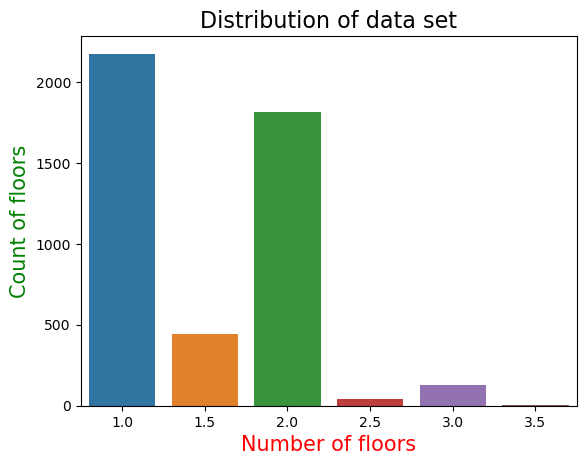

In [18]:
sns.countplot(x="floors",data=df)
plt.title("Distribution of data set",fontsize=16,c="k")
plt.xlabel("Number of floors",fontsize=15,c="r")
plt.ylabel("Count of floors",fontsize=15,c="g")
plt.show()

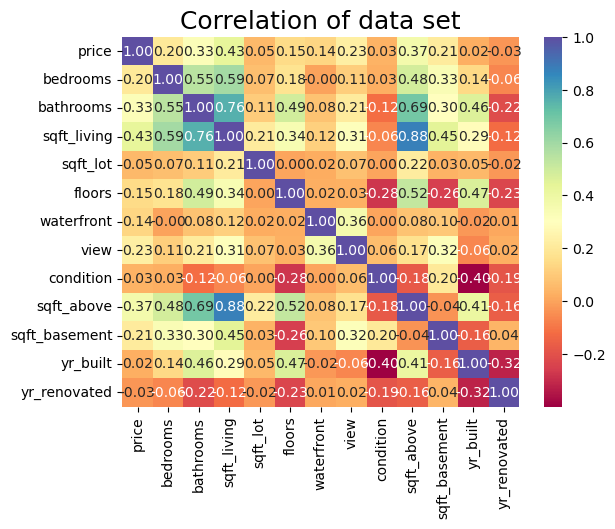

In [19]:
c=df.corr(numeric_only=True)
sns.heatmap(c,annot=True,fmt=".2f",cmap="Spectral")
plt.title("Correlation of data set",fontsize=18,c="k")
plt.show()

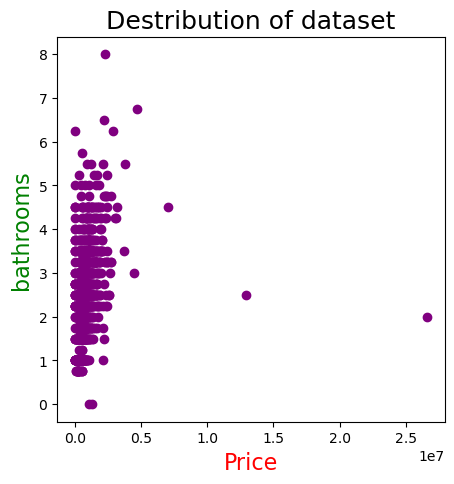

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(x=df["price"],y=df["bathrooms"],c="purple")
plt.title("Destribution of dataset",fontsize=18,c="k")
plt.xlabel("Price",fontsize=16,c="r")
plt.ylabel("bathrooms",fontsize=16,c="g")
plt.show()

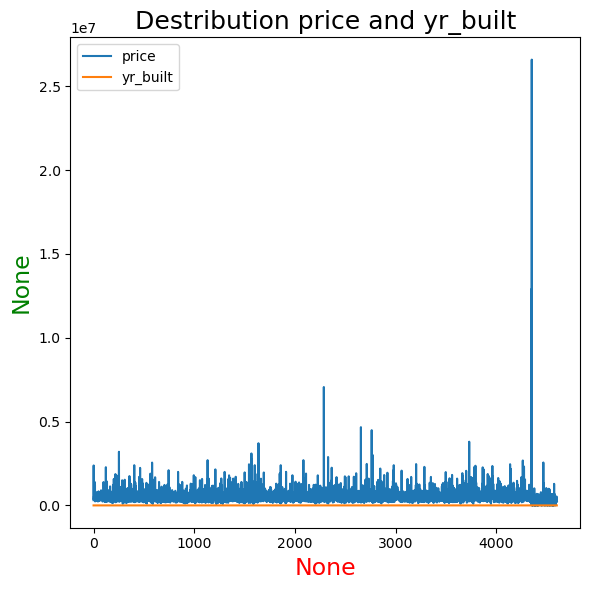

In [21]:
plt.figure(figsize=(6,6))
df["price"].plot()
df["yr_built"].plot()
plt.title("Destribution price and yr_built",fontsize=18,c="k")
plt.xlabel("None",fontsize=17,c="r")
plt.ylabel("None",fontsize=17,c="g")
plt.legend(["price","yr_built"])
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


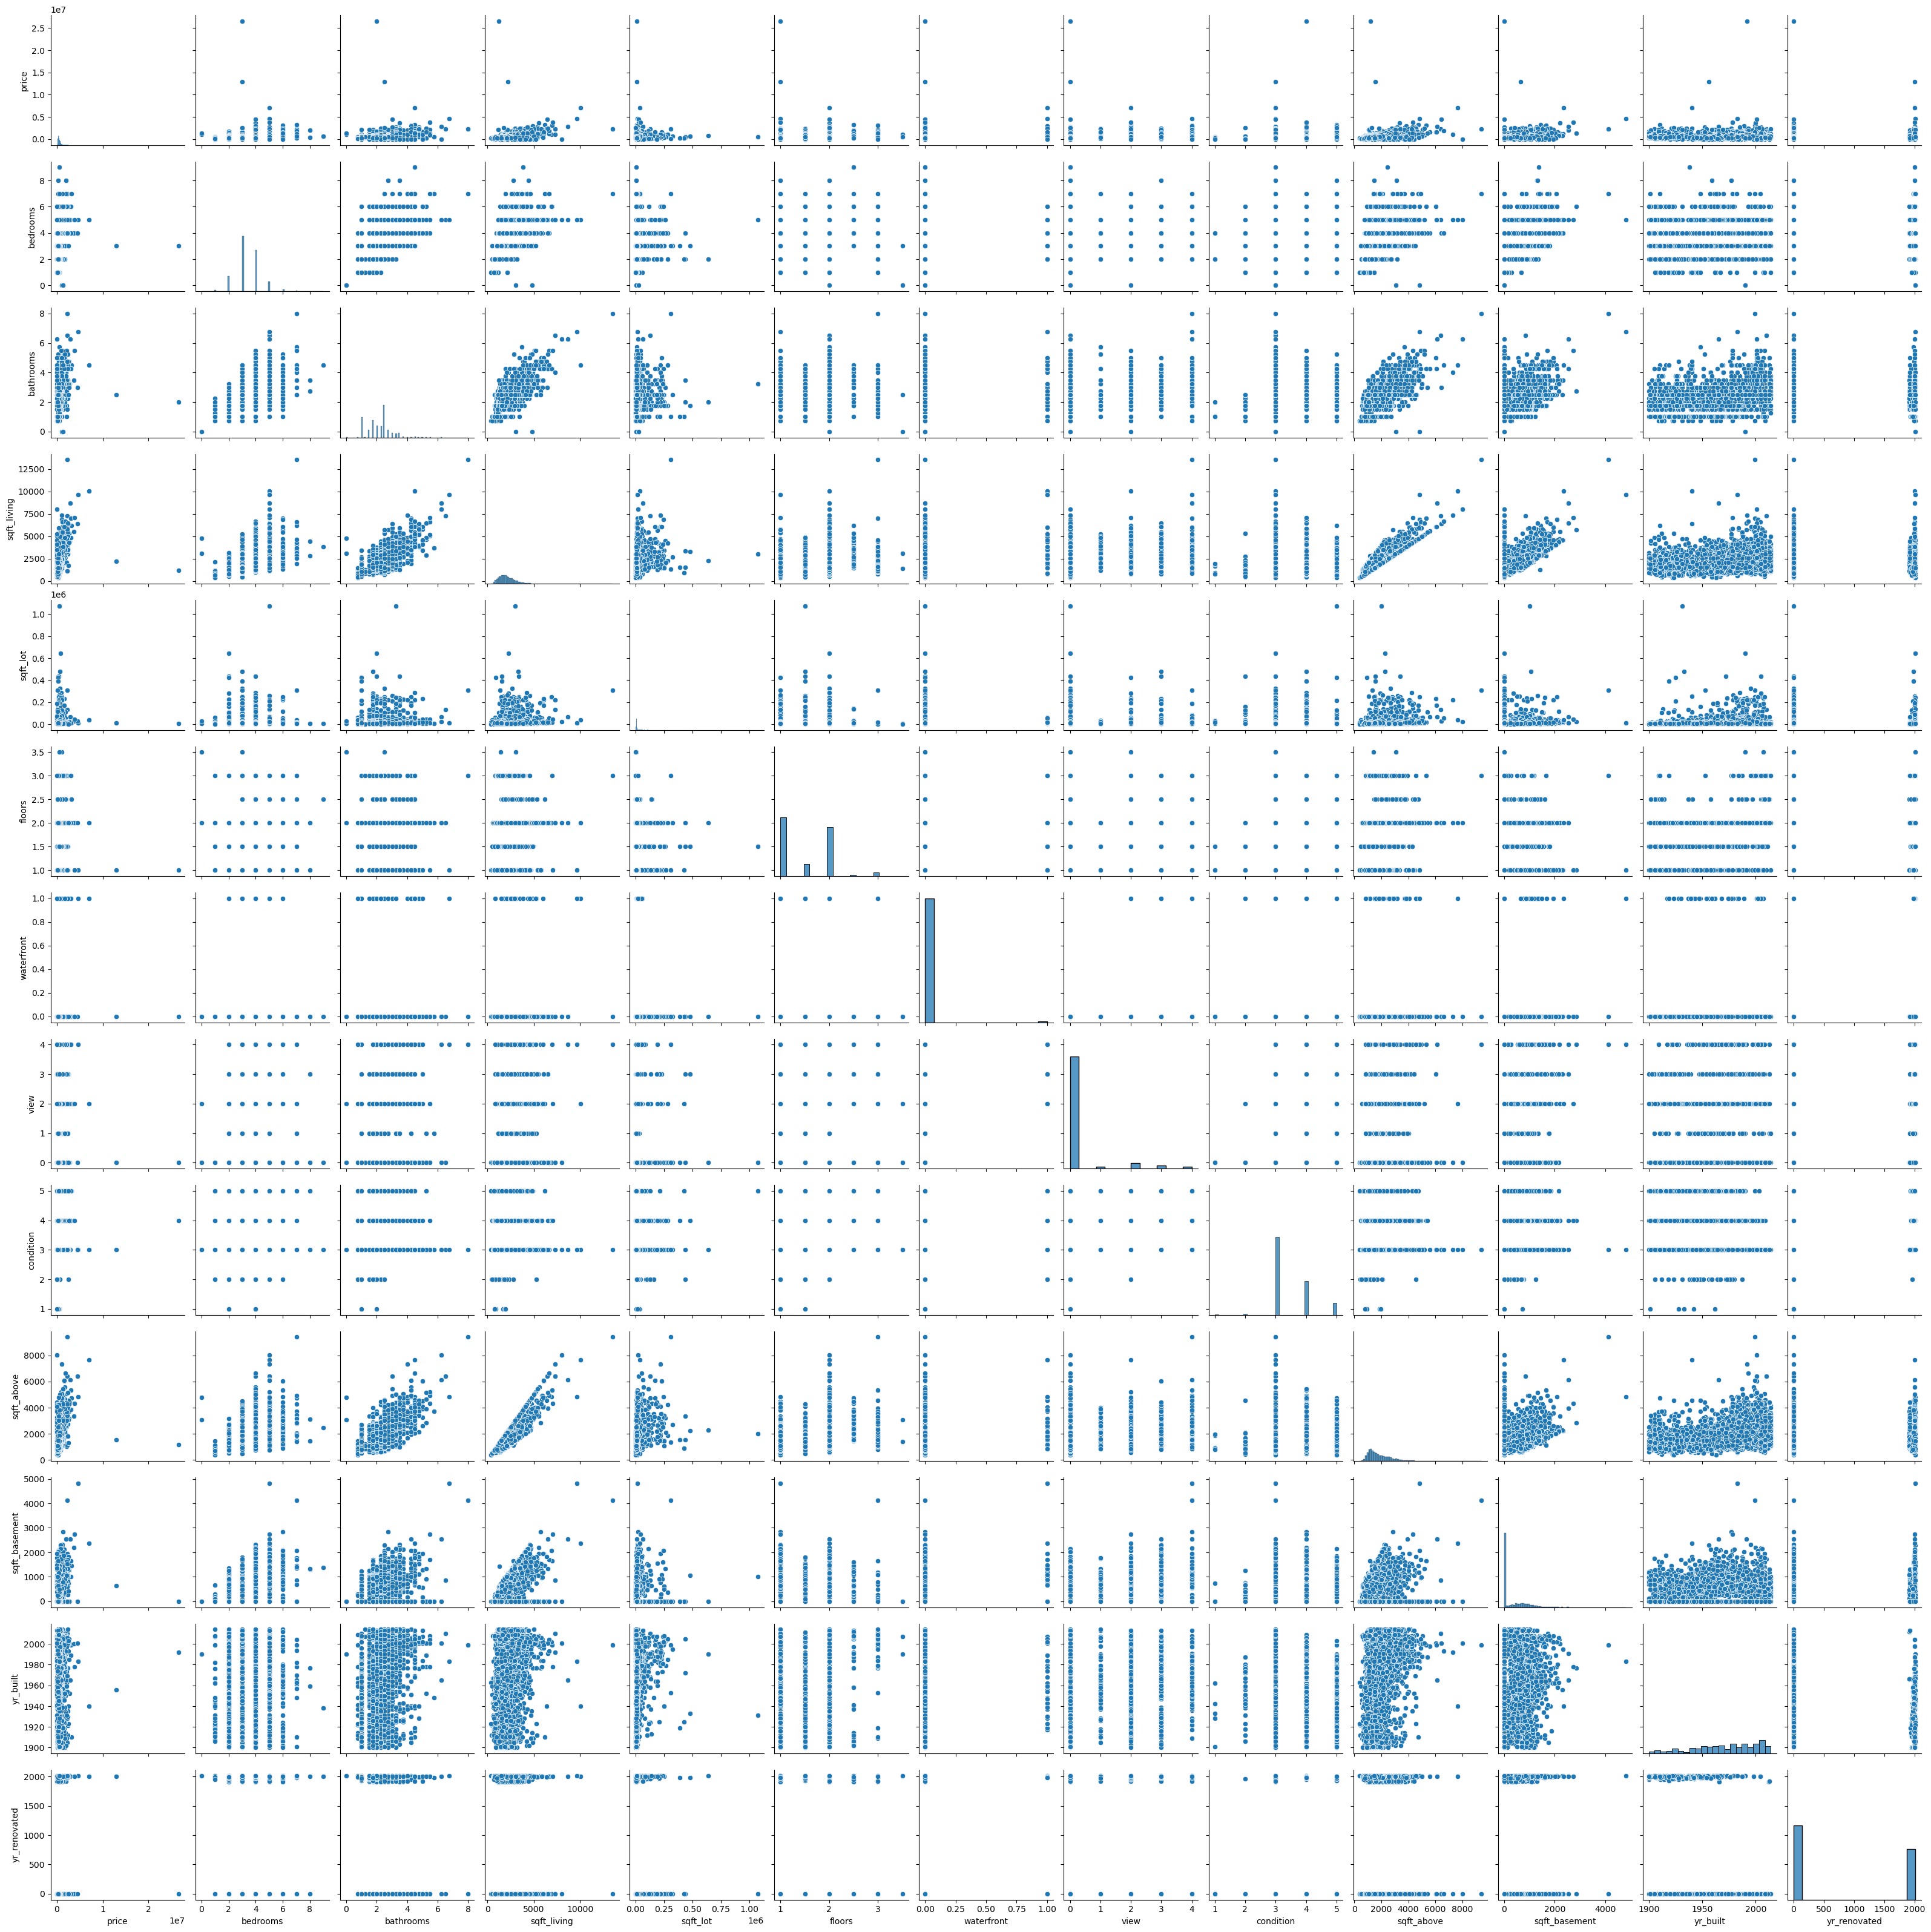

In [22]:
sns.pairplot(df)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_34272\3763230339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["yr_built"])


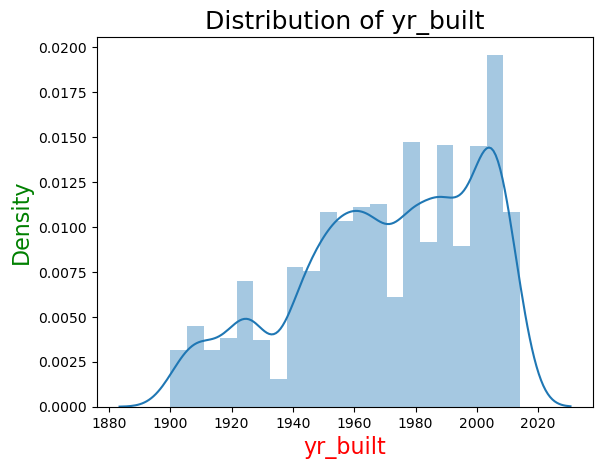

In [23]:
sns.distplot(df["yr_built"])
plt.title("Distribution of yr_built",fontsize=18,c="k")
plt.xlabel("yr_built",fontsize=16,c="r")
plt.ylabel("Density",fontsize=16,c="g")
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_34272\583710850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["sqft_living"],kde=False)


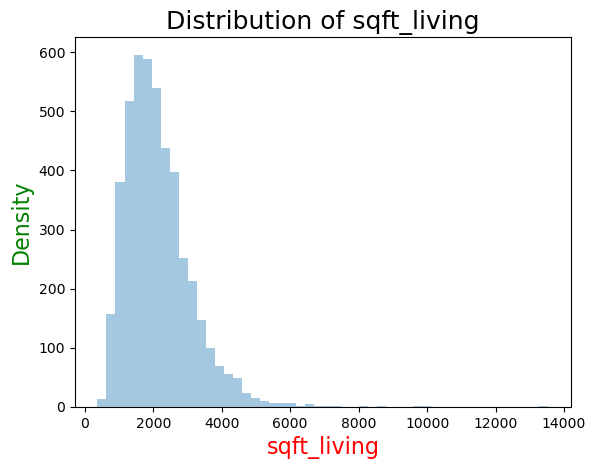

In [24]:
sns.distplot(df["sqft_living"],kde=False)
plt.title("Distribution of sqft_living",fontsize=18,c="k")
plt.xlabel("sqft_living",fontsize=16,c="r")
plt.ylabel("Density",fontsize=16,c="g")
plt.show()

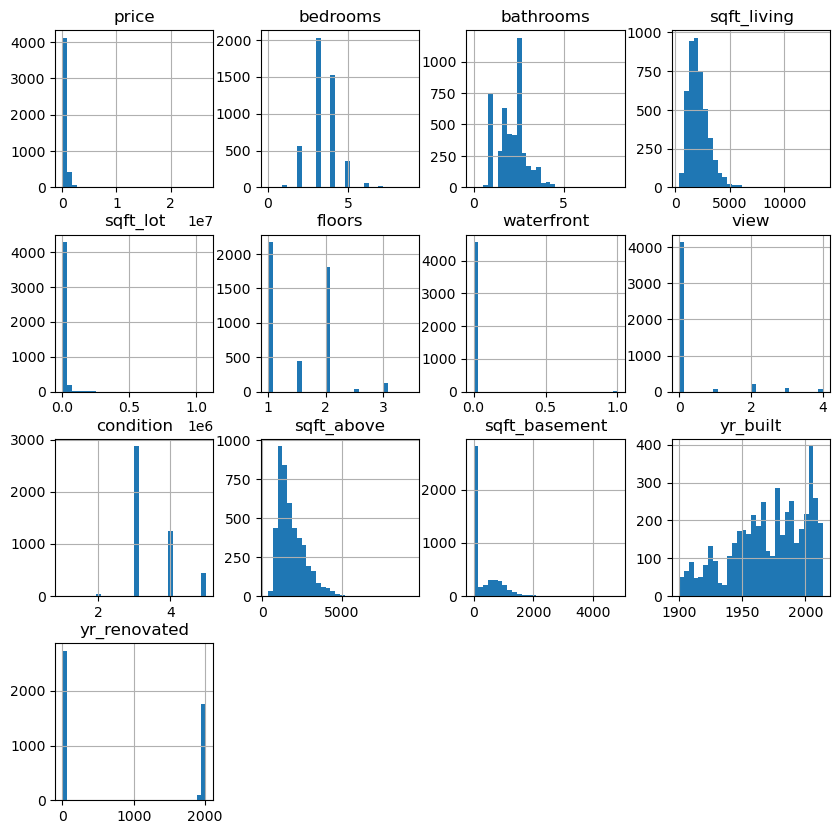

In [25]:
df.hist(bins=30,figsize=(10,10))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


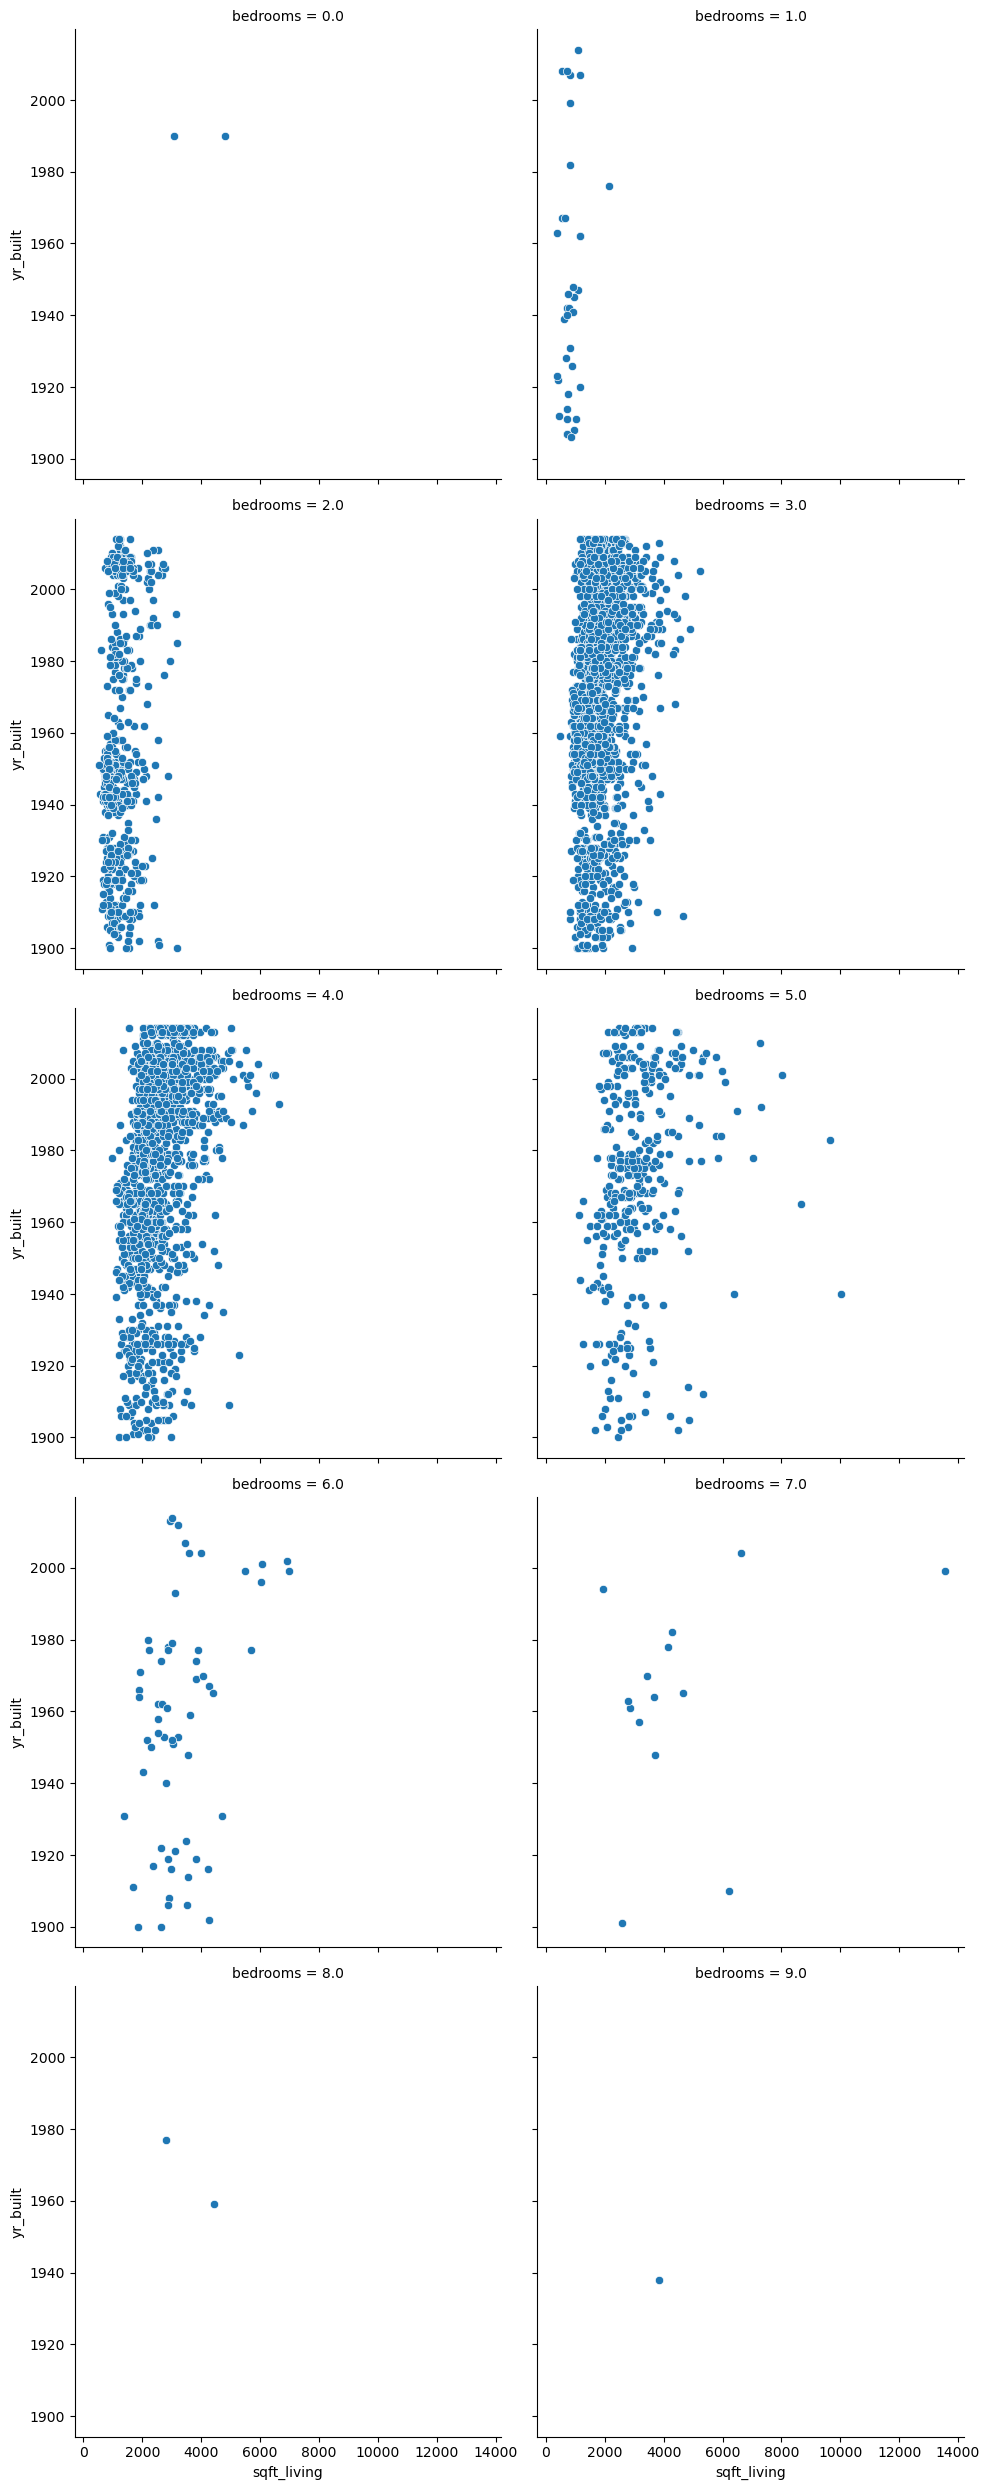

In [26]:
sns.relplot(x=df["sqft_living"],y=df["yr_built"],data=df,col="bedrooms",col_wrap=2)
plt.show()

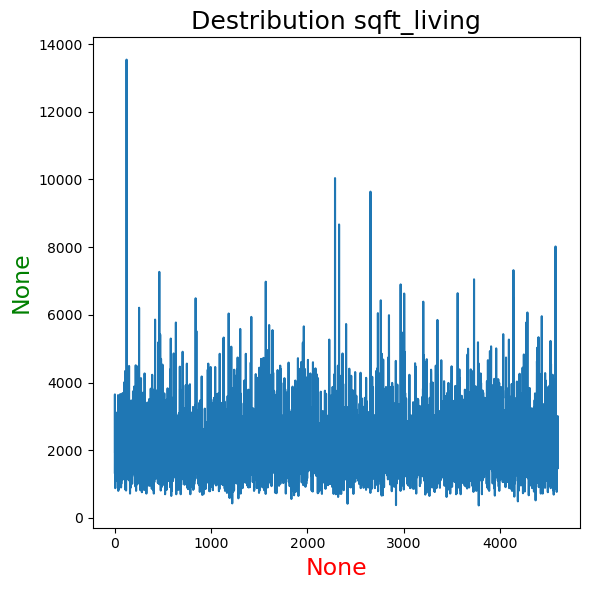

In [27]:
plt.figure(figsize=(6,6))
df["sqft_living"].plot()
plt.title("Destribution sqft_living",fontsize=18,c="k")
plt.xlabel("None",fontsize=17,c="r")
plt.ylabel("None",fontsize=17,c="g")
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


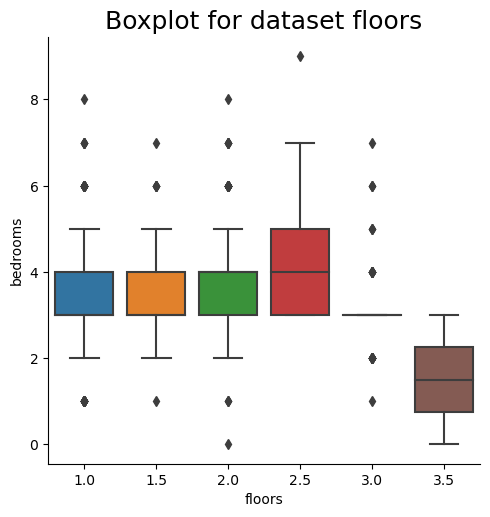

In [28]:
sns.catplot(x="floors",data=df,kind="box",y="bedrooms")
plt.title("Boxplot for dataset floors",fontsize=18,c="k")
plt.show()

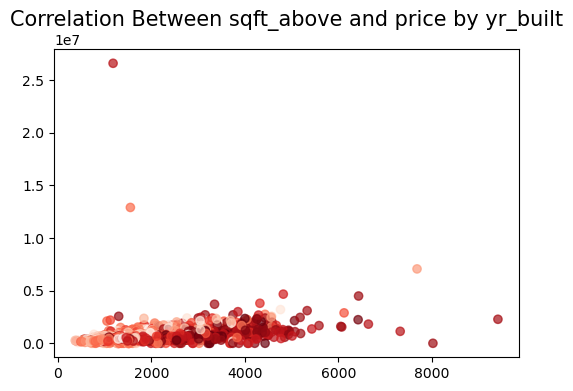

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(x=df["sqft_above"],y=df["price"],cmap=plt.get_cmap("Reds"),c=df["yr_built"],
           alpha=0.7)
plt.title("Correlation Between sqft_above and price by yr_built",fontsize=15,c="k")
plt.show()

<Axes: >

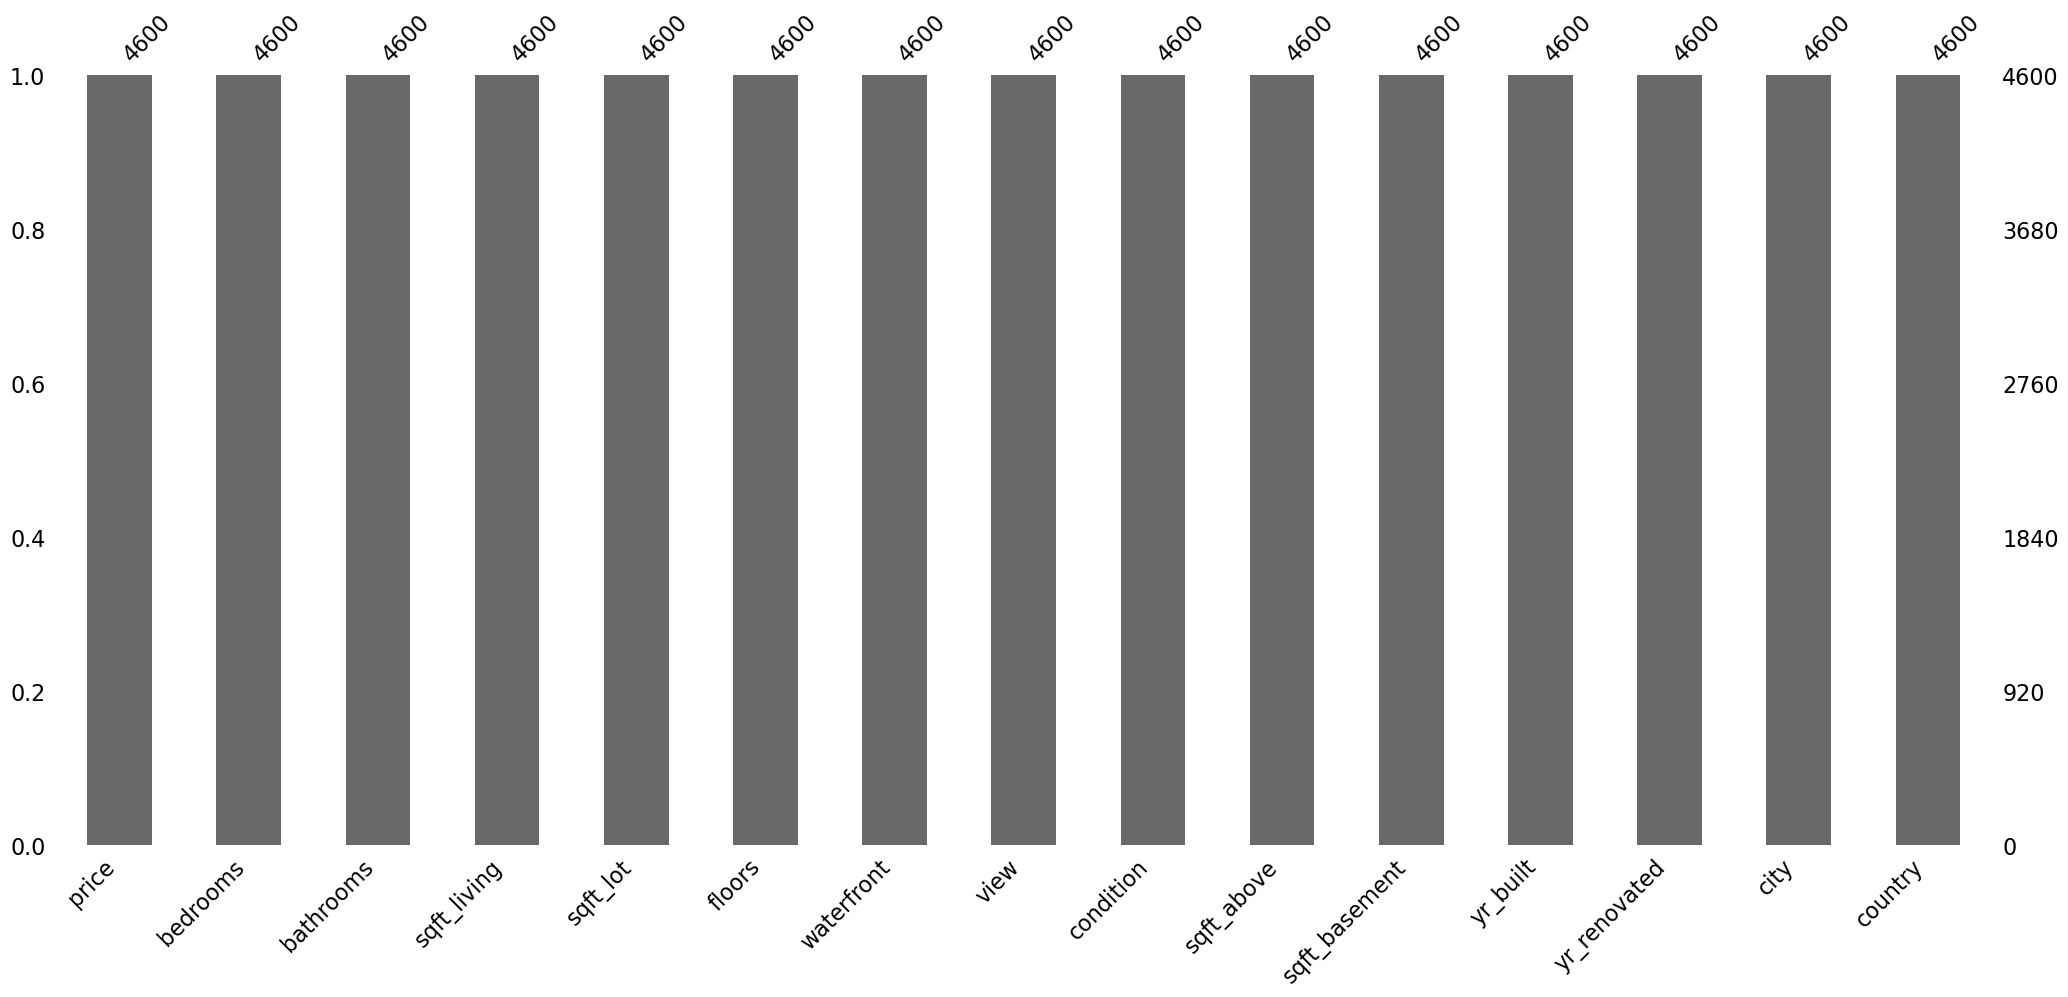

In [30]:
msno.bar(df)

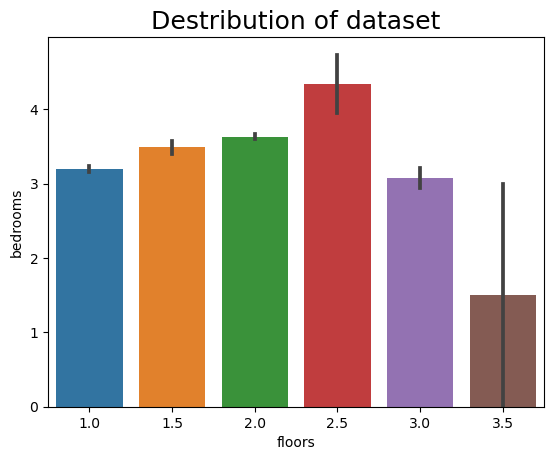

In [31]:
sns.barplot(data=df,x="floors",y="bedrooms")
plt.title("Destribution of dataset",fontsize=18,c="k")
plt.show()

<Axes: xlabel='floors'>

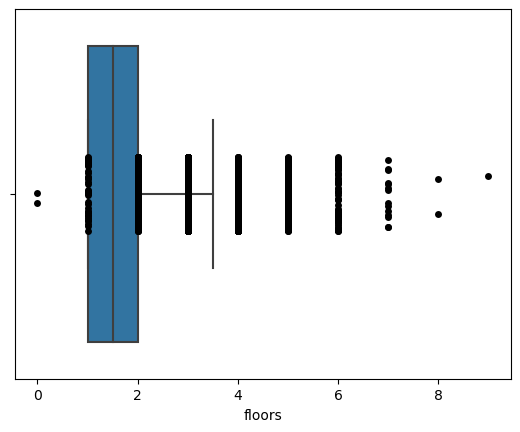

In [32]:
sns.boxplot(x=df["floors"],data=df)
sns.stripplot(x=df["bedrooms"],data=df,c="k")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


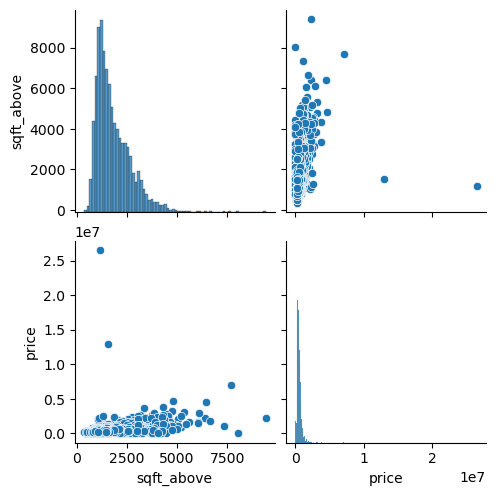

In [33]:
sns.pairplot(df,vars=["sqft_above","price"])
plt.show()

<Axes: >

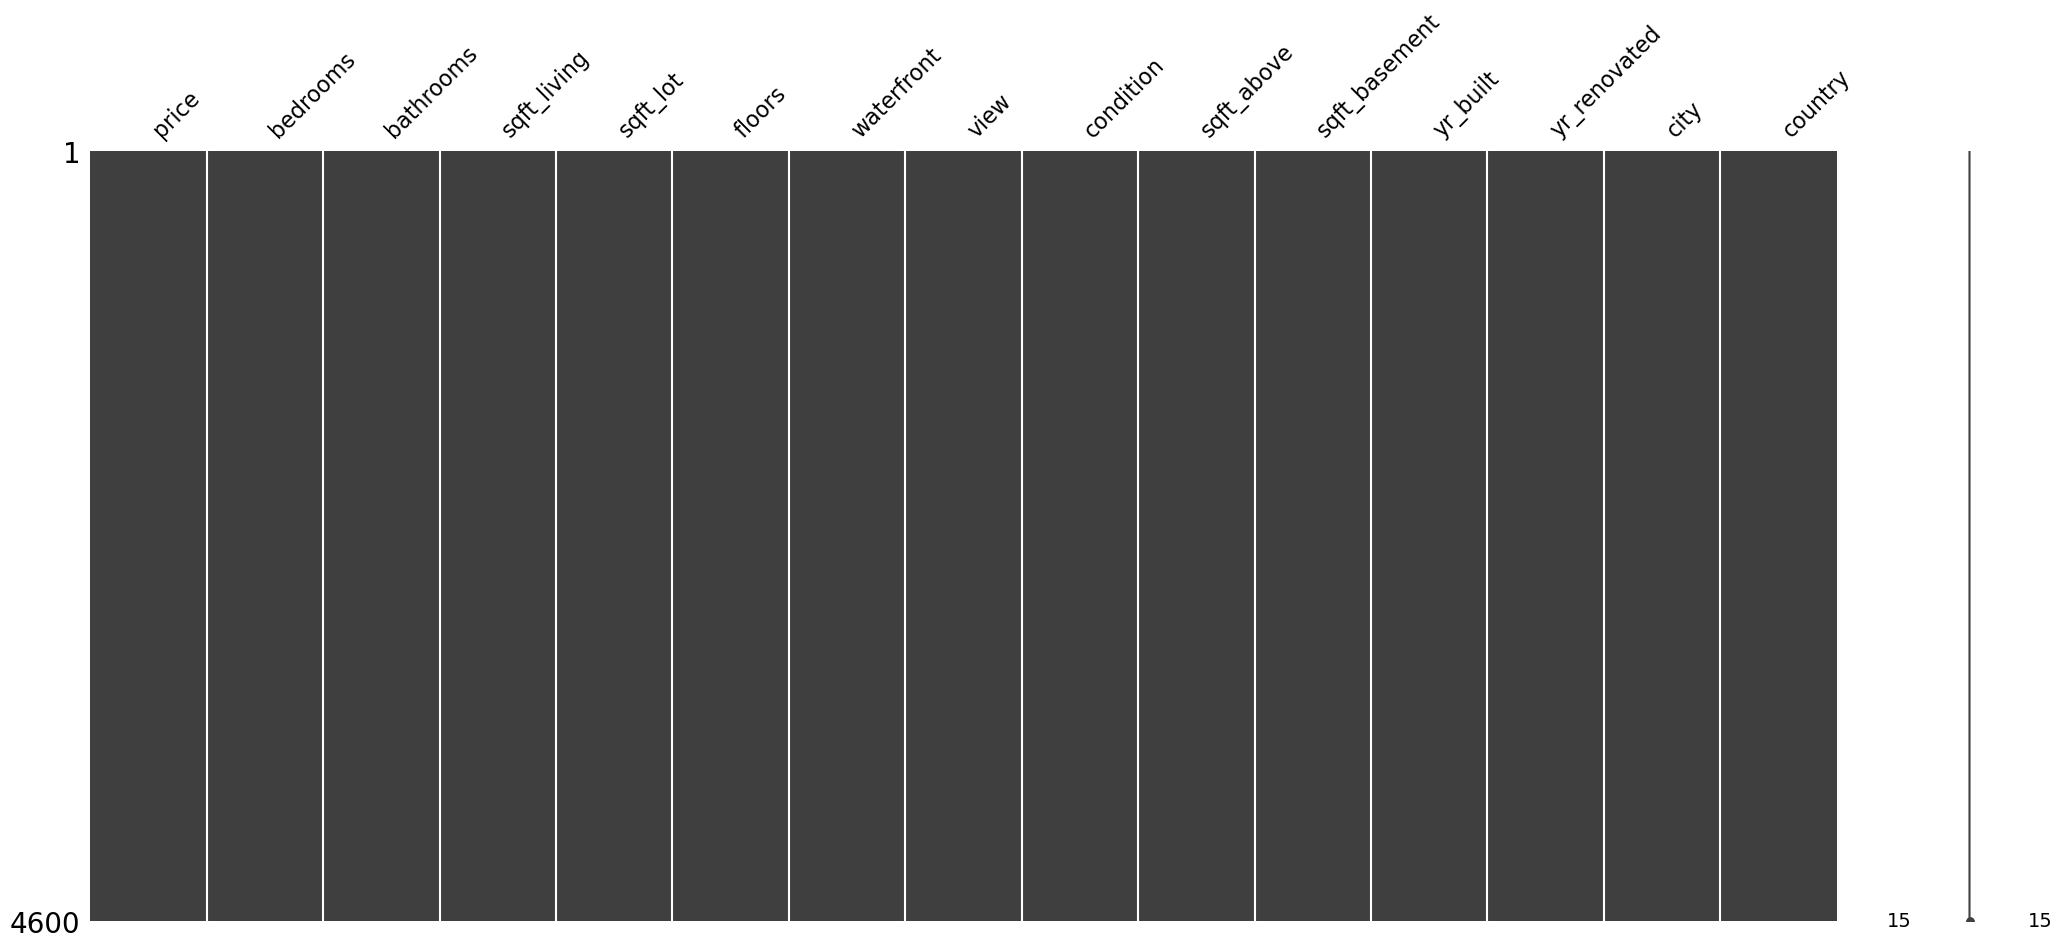

In [34]:
msno.matrix(df)

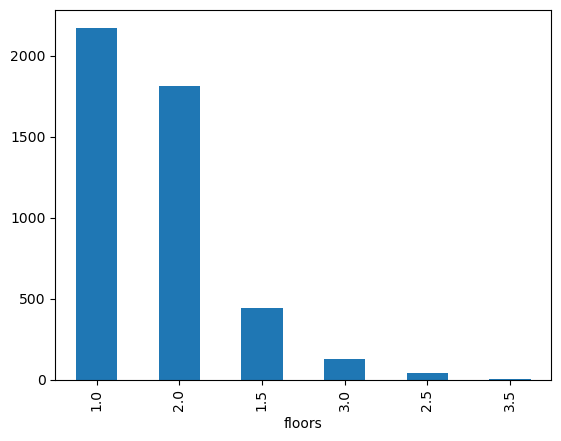

In [35]:
df.floors.value_counts().tail(10).plot(kind="bar")
plt.show()

In [36]:
df_corr= df.corr(numeric_only=True)[["floors","price"]]
df_corr

,floors,price
price,0.151461,1.000000
bedrooms,0.177895,0.200336
bathrooms,0.486428,0.327110
sqft_living,0.344512,0.430322
sqft_lot,0.003750,0.050451
floors,1.000000,0.151461
waterfront,0.022024,0.135648
view,0.031211,0.228504
condition,-0.275013,0.034915
sqft_above,0.522814,0.367570


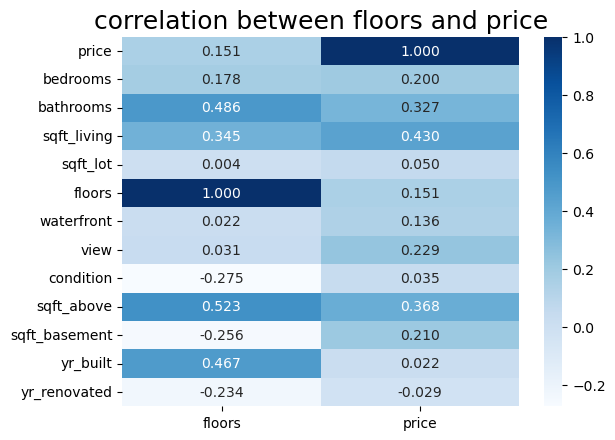

In [37]:
sns.heatmap(df_corr,annot=True,fmt=".3f",cmap="Blues")
plt.title("correlation between floors and price",fontsize=18,c="k")
plt.show()

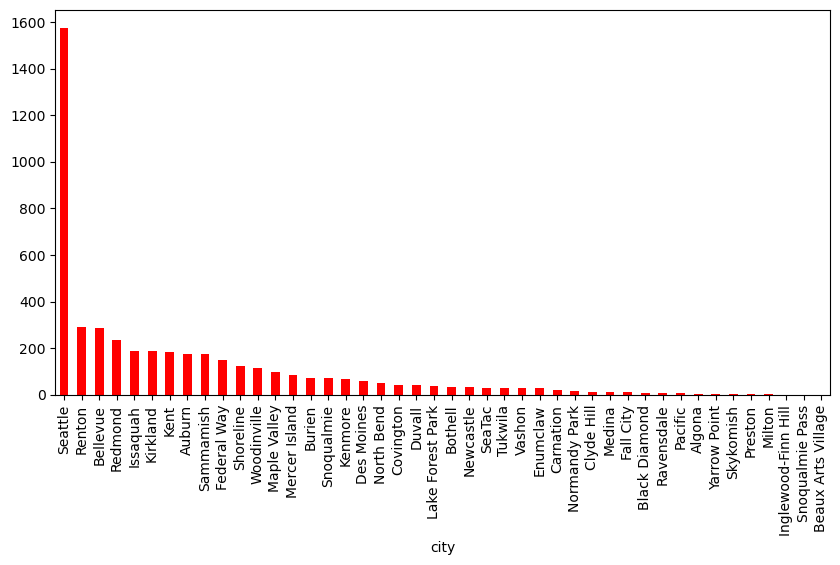

In [38]:
plt.figure(figsize=(10,5))
df.city.value_counts().plot(kind="bar",color="r")
plt.show()

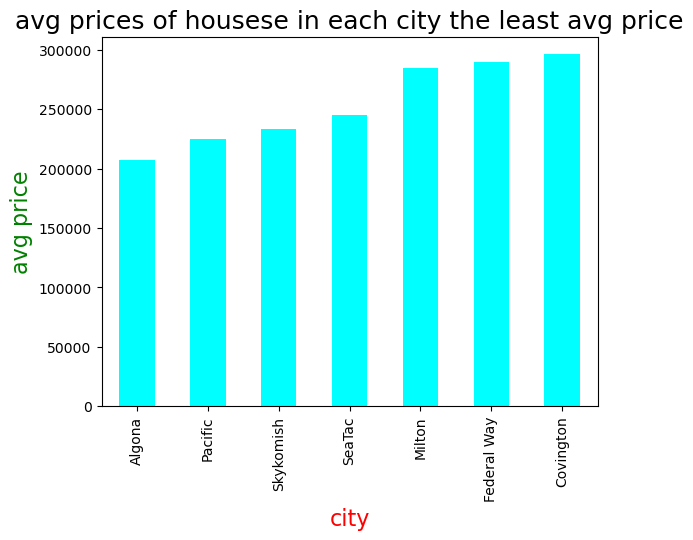

In [39]:
df.groupby('city')['price'].mean().sort_values().head(7).plot(kind="bar",color="cyan")
plt.xlabel("city",c="r",fontsize=16)
plt.ylabel("avg price",c="g",fontsize=16)
plt.title("avg prices of housese in each city the least avg price",fontsize=18,c="k");

<Axes: xlabel='bedrooms', ylabel='floors'>

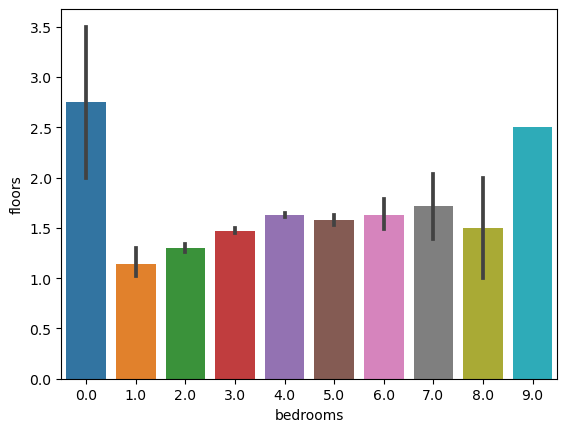

In [40]:
sns.barplot(x=df["bedrooms"],y=df["floors"])

<Axes: title={'center': 'plotting boxplot to checking outliers price vs floors'}, xlabel='floors', ylabel='outliers'>

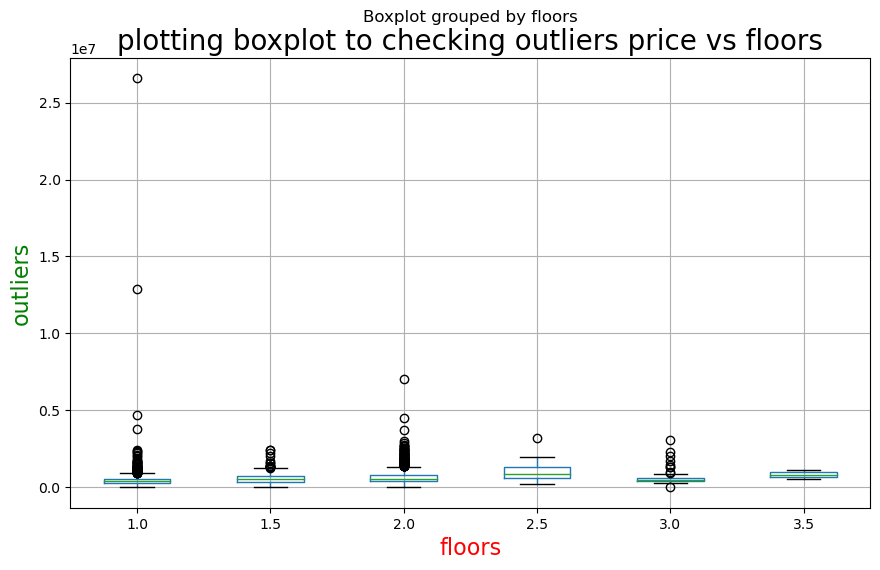

In [41]:
b=df.boxplot(column="price",by="floors",figsize=(10,6))
plt.title("plotting boxplot to checking outliers price vs floors",fontsize=20,c="k")
plt.xlabel("floors",fontsize=16,c="r")
plt.ylabel("outliers",fontsize=16,c="g")
b

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


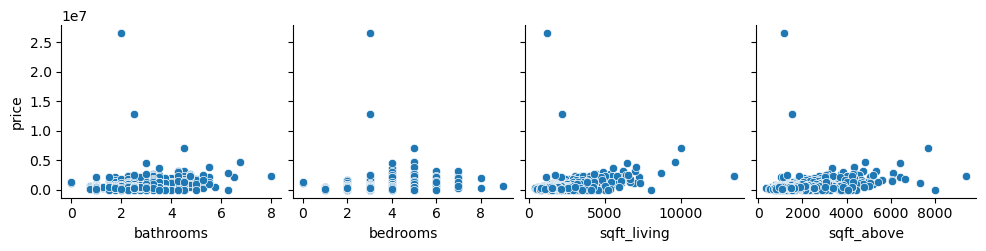

In [42]:
sns.pairplot(data=df,x_vars=["bathrooms","bedrooms","sqft_living","sqft_above"],
             y_vars=["price"])
plt.show()

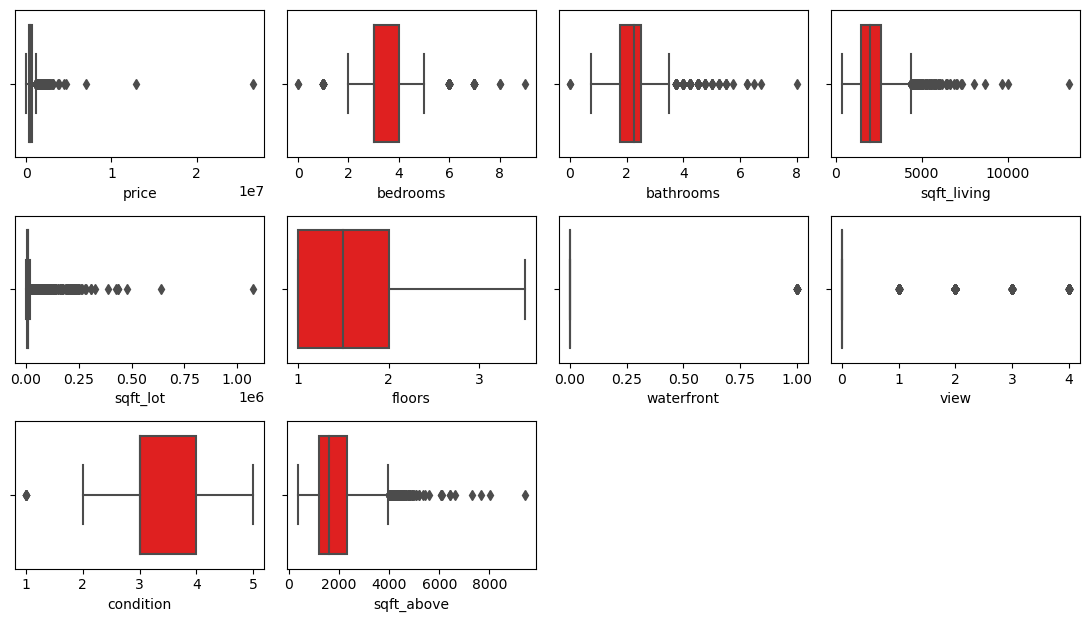

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(11, 10))
for i, j in zip(df.columns[:10], range(1, 11)):
    plt.subplot(5, 4, j)
    sns.boxplot(x=df[i], color="red")
fig.tight_layout()
plt.show()

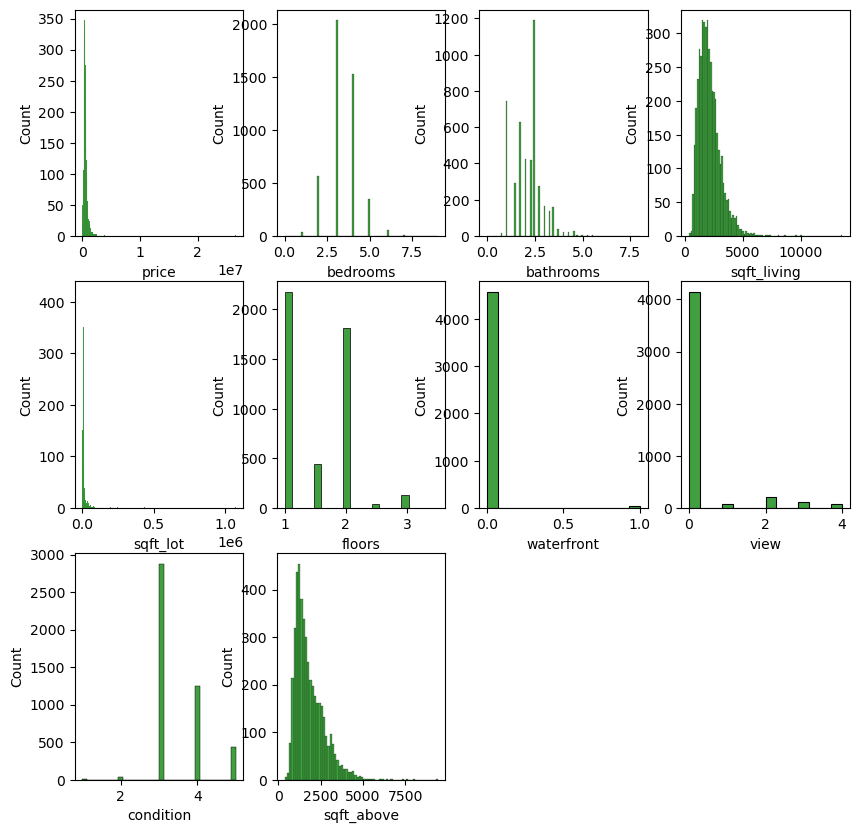

In [44]:
fig=plt.figure(figsize=(10,10))
for i,j in zip (df.columns[:10],range(1,11)):
    plt.subplot(3,4,j)
    sns.histplot(x=df[i],color="g")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


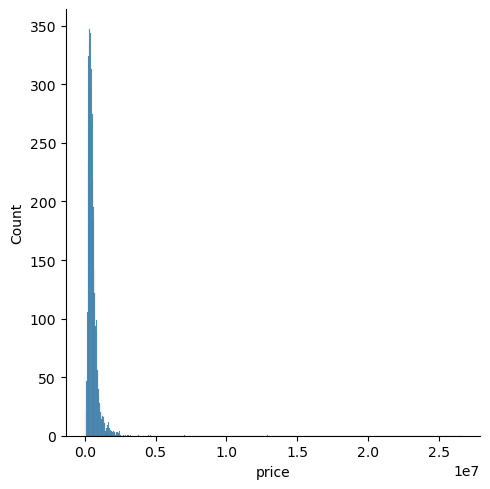

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


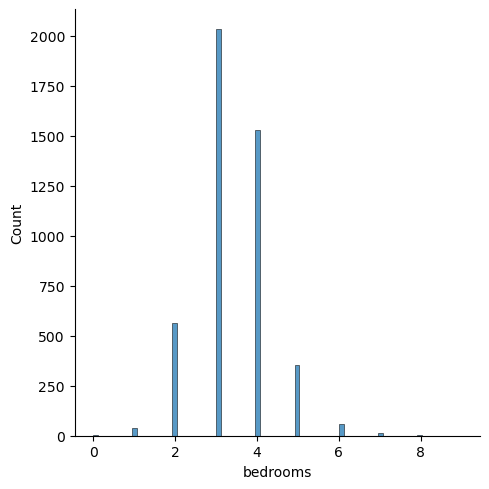

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


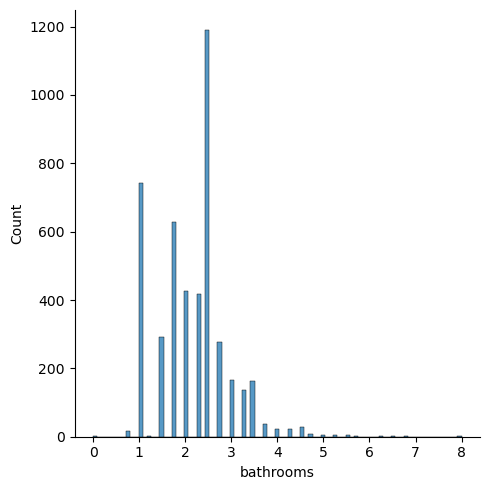

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


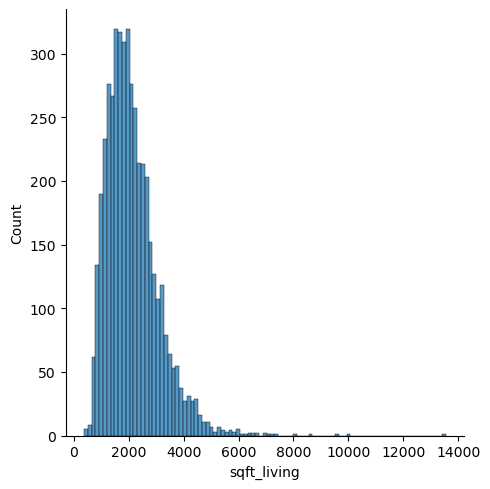

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


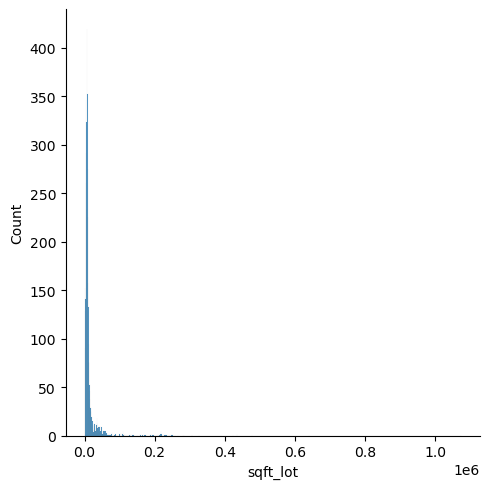

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


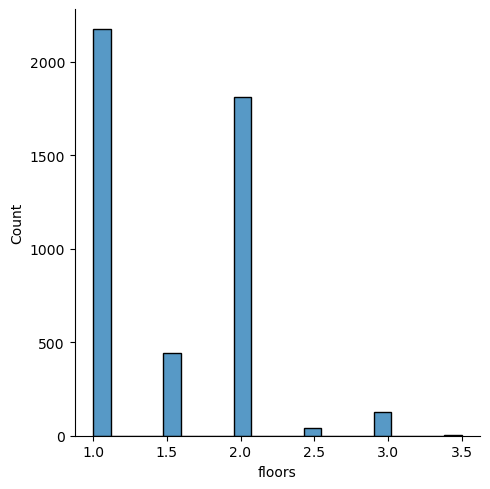

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


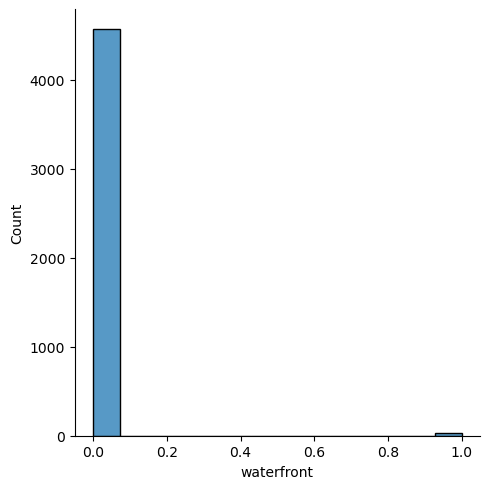

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


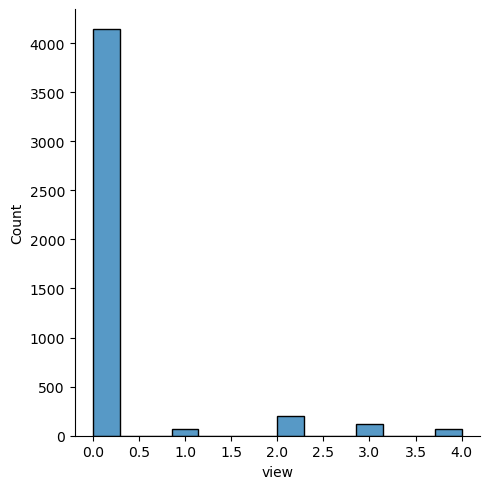

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


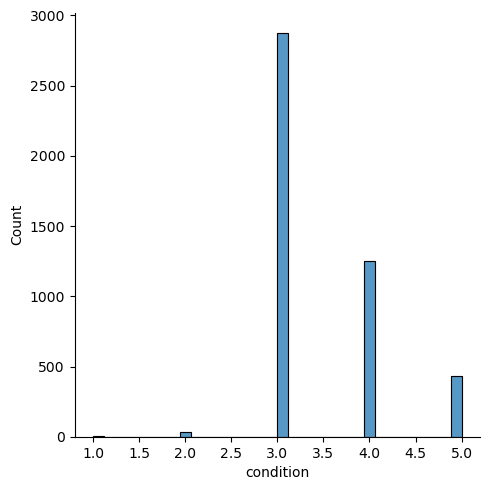

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


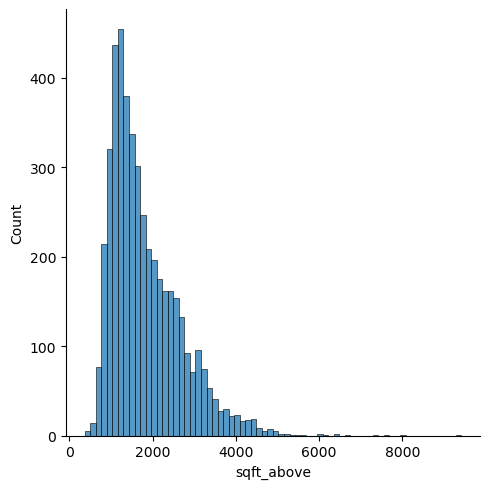

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


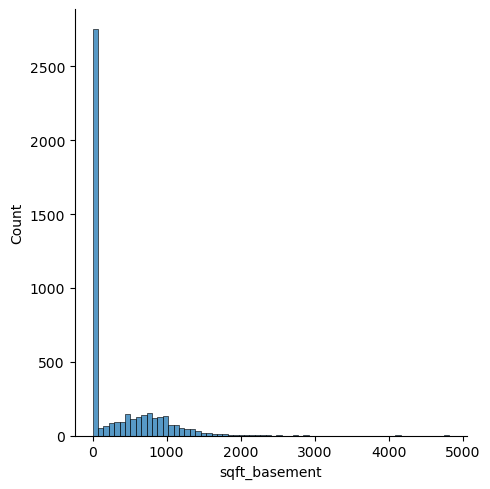

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


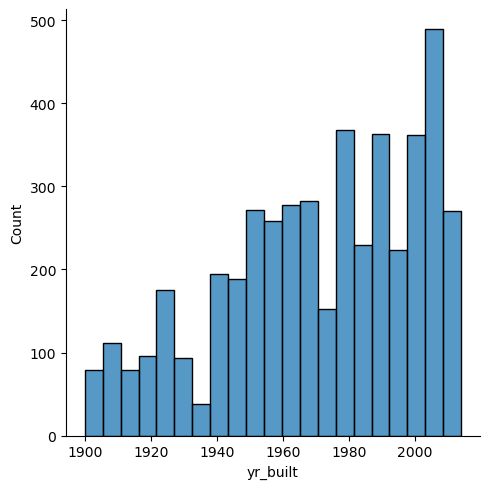

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


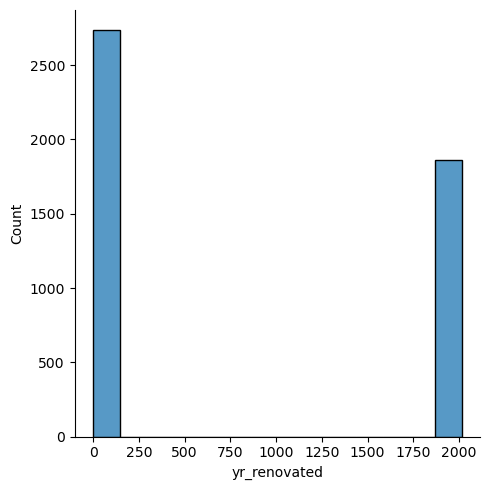

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


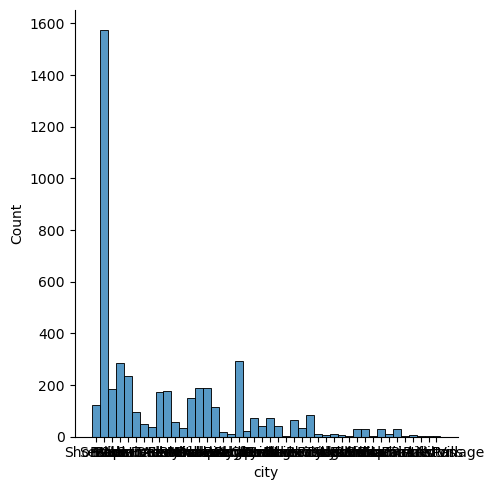

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


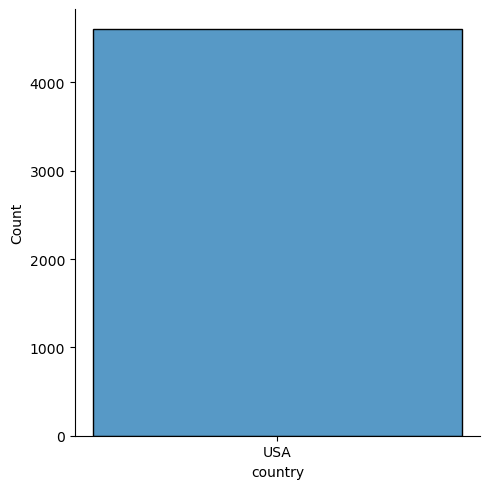

In [45]:
for i in df:
    sns.displot(df[i])
    plt.show()

In [46]:
### preprocessing
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
df["city"]=Encoder.fit_transform(df["city"])
df["city"]

0       36
1       35
2       18
3        3
4       31
        ..
4595    35
4596     3
4597    32
4598    35
4599     9
Name: city, Length: 4600, dtype: int32

In [47]:
df["city"].unique()

array([36, 35, 18,  3, 31, 21, 27, 20, 33,  1, 10,  5, 14, 19, 16, 42, 26,
       13, 32,  7, 38, 11,  6,  9, 15, 17, 25, 23,  4, 30,  8,  0, 37, 40,
       41, 43, 34, 22, 12, 39, 28,  2, 29, 24])

In [48]:
### to makesure the column city is modified by labelencoder ,print df
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,USA
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,USA
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,USA
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,USA
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,USA
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,USA
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32,USA
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35,USA


In [49]:
df["country"].unique()

array(['USA'], dtype=object)

In [50]:
replacement={"USA":"1"}
df["country"]=df["country"].replace(replacement)
df["country"]

0       1
1       1
2       1
3       1
4       1
       ..
4595    1
4596    1
4597    1
4598    1
4599    1
Name: country, Length: 4600, dtype: object

In [51]:
df["country"].unique()

array(['1'], dtype=object)

In [52]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,1
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,1
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,1
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,1
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,1
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,1
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32,1
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35,1


In [53]:
### split data to x and y
x=df.drop("price",axis=1)
y=df["price"]

In [54]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,1
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,1
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,1
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,1
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,1
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,1
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32,1
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35,1


In [55]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,shuffle=True,random_state=42)


In [57]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)


x_train shape (3910, 14)
x_test shape (690, 14)
y_train shape (3910,)
y_test shape (690,)


In [58]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [59]:
### RandomForestRegressor
fr=RandomForestRegressor(n_estimators=10,max_depth=9)
fr.fit(x_train,y_train)


RandomForestRegressor(max_depth=9, n_estimators=10)

In [60]:
fr.score(x_train,y_train)

0.8486984631061714

In [61]:
mse_score_fr=cross_val_score(estimator=fr,X=x_train,y=y_train,cv=5,n_jobs=4,
                            scoring="neg_mean_squared_error")
mse_score_fr=-1*mse_score_fr
mse_score_fr


array([9.49422810e+11, 1.57710569e+11, 9.71195278e+10, 6.82413684e+10,
       1.03249270e+11])

In [62]:
y_pred_fr=cross_val_predict(estimator=fr,X=x_train,y=y_train,cv=5,n_jobs=-1,method="predict")
y_pred_fr

array([ 546494.23271428, 1195501.86240995,  424006.37793773, ...,
        302435.4830281 ,  382898.88603357,  445318.81976987])

In [63]:
mse_fr=mean_squared_error(y_train,y_pred_fr)
mse_fr

296941506794.6919

In [64]:
rmse_score_fr=np.sqrt(mse_fr)
rmse_score_fr

544923.3953453383

In [65]:
### Tuning for RandomForest
parms_test={"n_estimators":[10,20,35,40],
           "max_features":[2,4,6,8]}
grid_search=GridSearchCV(estimator=fr,param_grid=parms_test,cv=5,
                         scoring="neg_mean_squared_error",n_jobs=-1,return_train_score=True)


In [66]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=9, n_estimators=10),
             n_jobs=-1,
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 35, 40]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
### get best model hyperparamrters
best_model=grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=9, max_features=4, n_estimators=40)

In [68]:
### get best score
score_best=grid_search.best_score_
score_best=np.sqrt(-score_best)
print("score best after tuning",score_best)

#cvres=gride_search.cv_results_
#for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    #print(np.sqrt(-mean_score),params)

score best after tuning 499945.1088800674


In [69]:
#### Tuning by RandomizedSearchCV
parms_best_fr={"n_estimators": np.arange(100,500,50),
                  "max_depth": np.arange(4,20,2)
                  }
search_random_fr=RandomizedSearchCV(estimator=fr,param_distributions=parms_best_fr,
                                       n_iter=4,random_state=422,scoring="neg_mean_squared_error",
                                       cv=5,verbose=6)
search_random_fr.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END max_depth=6, n_estimators=300;, score=-945632385060.014 total time=   2.8s
[CV 2/5] END max_depth=6, n_estimators=300;, score=-165725867501.603 total time=   2.8s
[CV 3/5] END max_depth=6, n_estimators=300;, score=-88181156785.554 total time=   2.9s
[CV 4/5] END max_depth=6, n_estimators=300;, score=-123920508216.335 total time=   2.7s
[CV 5/5] END max_depth=6, n_estimators=300;, score=-114159276179.428 total time=   2.8s
[CV 1/5] END max_depth=12, n_estimators=250;, score=-944090060670.694 total time=   5.8s
[CV 2/5] END max_depth=12, n_estimators=250;, score=-156232370815.165 total time=   5.9s
[CV 3/5] END max_depth=12, n_estimators=250;, score=-94153481832.056 total time=   5.7s
[CV 4/5] END max_depth=12, n_estimators=250;, score=-129181617774.344 total time=   5.7s
[CV 5/5] END max_depth=12, n_estimators=250;, score=-99781229403.331 total time=   5.8s
[CV 1/5] END max_depth=8, n_estimators=100;, score=-942899

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=9,
                                                   n_estimators=10),
                   n_iter=4,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [70]:
best_forest=search_random_fr.best_estimator_
best_forest

RandomForestRegressor(max_depth=12, n_estimators=250)

In [71]:
### get best score
score_best=search_random_fr.best_score_
score_best=np.sqrt(-score_best)
print("score best after tuning",score_best)


score best after tuning 533561.3855022847


In [72]:
#### linearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
mse_score_lr=cross_val_score(estimator=lr,X=x_train,y=y_train,cv=5,n_jobs=4,
                            scoring="neg_mean_squared_error")
mse_score_lr=-1*mse_score_lr
mse_score_lr


array([9.49727458e+11, 6.50956429e+10, 7.27376362e+10, 6.46986993e+10,
       7.67378678e+10])

In [74]:
y_pred_lr=cross_val_predict(estimator=lr,X=x_train,y=y_train,cv=5,n_jobs=-1,method="predict")
y_pred_lr

array([ 588695.68860315, 1126809.10328719,  564328.6334679 , ...,
        351168.22832214,  390880.55335512,  433328.16291979])

In [75]:
mse_lr=mean_squared_error(y_train,y_pred_lr)
mse_lr

245799460929.02563

In [76]:
rmse_score_lr=np.sqrt(mse_lr)
rmse_score_lr

495781.666592287

In [77]:
#### DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [78]:
dt.score(x_train,y_train)

0.999998444269451

In [79]:
mse_score_dt=cross_val_score(estimator=dt,X=x_train,y=y_train,cv=5,n_jobs=4,
                            scoring="neg_mean_squared_error")
mse_score_dt=-1*mse_score_dt
mse_score_dt


array([1.00683130e+12, 1.02154074e+12, 1.40367432e+11, 1.03736930e+11,
       1.11478753e+11])

In [80]:
y_pred_dt=cross_val_predict(estimator=dt,X=x_train,y=y_train,cv=5,n_jobs=-1,method="predict")
y_pred_dt

array([ 305495., 1300000.,  257000., ...,  285000.,  350000.,  459500.])

In [81]:
mse_dt=mean_squared_error(y_train,y_pred_dt)
mse_dt

484656350343.12866

In [82]:
rmse_score_dt=np.sqrt(mse_dt)
rmse_score_dt

696172.6440640488

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_train

array([[-0.4376897 ,  1.4027426 , -0.11149547, ..., -0.82558885,
         0.44732748,  0.        ],
       [ 0.66784436,  1.72346791,  2.3390998 , ..., -0.82558885,
         0.53075862,  0.        ],
       [ 0.66784436,  0.11984135,  0.39119074, ..., -0.82558885,
        -0.97100192,  0.        ],
       ...,
       [-0.4376897 , -1.48378521, -1.03308685, ...,  1.17367243,
         0.86448319,  0.        ],
       [-1.54322376, -1.48378521, -1.28442996, ...,  1.22166287,
         0.78105205,  0.        ],
       [-1.54322376, -1.48378521, -0.67701745, ..., -0.82558885,
         0.78105205,  0.        ]])

In [84]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
y_train=sc.fit_transform(np.array(y_train).reshape(-1,1))
y_train

array([[ 0.24122677],
       [ 0.84862433],
       [-0.50489859],
       ...,
       [-0.46442627],
       [ 0.08937738],
       [-0.13393054]])

In [85]:
y_train.shape

(3910, 1)

In [95]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming you have your X_train and y_train data loaded already



# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
y_pred = model.predict(x_train)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error (MSE):", mse)


Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - loss: 0.4514 
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.5385
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 1.1816
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - loss: 1.2960
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.6451
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.6807
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - loss: 2.3420
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.5286
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.5908
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 0.3061
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 0.2331
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.4524
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 0.8485
Epoch 14/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 1.3505
Epoch 15/50
123/123 ━━━━━━━━━━━━━━━━━━━

In [114]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error , mean_absolute_error

model=Sequential()
model.add(Dense(100,activation="relu",input_shape=(x_train.shape[1],)))
model.add(Dense(130,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1))

summary=model.summary()


model.compile(optimizer="adam",loss="mean_squared_error")
x=model.fit(x_train,y_train,epochs=100)


y_pred=model.predict(x_train)
mse=mean_squared_error(y_train,y_pred)
mae=mean_absolute_error(y_train,y_pred)

print("mean_squared_error",mse)
print("mean_absolute_error",mae)



C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 100)            │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 130)            │        13,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 150)            │        19,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,431 (134.50 KB)

 Trainable params: 34,431 (134.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - loss: 1.7909 
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.3417
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.2430
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 0.3698
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.5577
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 1.1440
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - loss: 0.7882
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.2071
Epoch 9/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.1868
Epoch 10/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.2229
Epoch 11/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.2464
Epoch 12/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.2358
Epoch 13/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.6706
Epoch 14/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.2013
Epoch 15/100
1